
## Exercise meanshift
1. load 'data/iris_data.csv' into a dataframe (use decimal=',') and remove the 2 `Petal` columns. Now we are left with a 2D feature space
2. get unique labels (Species column)
3. plot with a scatter plot each iris flower sample colored by label (3 different colors)
4. use: `MeanShift` and `estimate_bandwidth` from `sklearn.cluster` to first estimate bandwidth and then get the clusters (HINT: estimate_bandwidth() takes an argument: `quantile` set it to `0.2` for best result)
5. print out labels, cluster centers and number of clusters (as returned from the MeanShift function)
5. create a new scatter plot where each flower is colored according to cluster label
6. add a dot for the cluster centers
7. Compare the 2 plots (colored by actual labels vs. colored by cluster label)
8. Try changing the 'quantile' argument to 0.15 and see what happens to your cluster plot.


## 1 & 2 )

In [110]:
import pandas as pd

imported = pd.read_csv('../data/iris_data.csv',decimal=',')
df = pd.DataFrame(imported)
df.drop(['Petal length'],'columns',inplace=True)
print(df)

     Sepal length  Sepal width  Petal width       Species
0             5.1          3.5          0.2     I. setosa
1             4.9          3.0          0.2     I. setosa
2             4.7          3.2          0.2     I. setosa
3             4.6          3.1          0.2     I. setosa
4             5.0          3.6          0.2     I. setosa
..            ...          ...          ...           ...
145           6.7          3.0          2.3  I. virginica
146           6.3          2.5          1.9  I. virginica
147           6.5          3.0          2.0  I. virginica
148           6.2          3.4          2.3  I. virginica
149           5.9          3.0          1.8  I. virginica

[150 rows x 4 columns]


## 3 ) 

In [111]:
from sklearn import preprocessing
# Convert gender to 0 or 1
label_enc =preprocessing.LabelEncoder()
df['Species'] = label_enc.fit_transform(df['Species'].astype(str))
print(df)

     Sepal length  Sepal width  Petal width  Species
0             5.1          3.5          0.2        0
1             4.9          3.0          0.2        0
2             4.7          3.2          0.2        0
3             4.6          3.1          0.2        0
4             5.0          3.6          0.2        0
..            ...          ...          ...      ...
145           6.7          3.0          2.3        2
146           6.3          2.5          1.9        2
147           6.5          3.0          2.0        2
148           6.2          3.4          2.3        2
149           5.9          3.0          1.8        2

[150 rows x 4 columns]


[0 1 2]


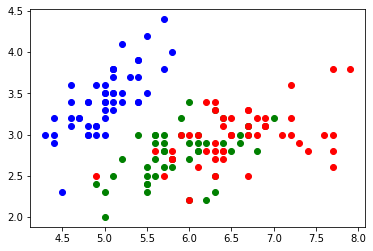

In [112]:
import matplotlib.pyplot as plt
from itertools import cycle
import numpy as np

fig = plt.figure()

clusters = np.unique(df['Species'])
print(clusters)

colors = cycle('bgrcmy')
for k, col in zip(clusters, colors):
    
    #tager hvor labels 0 1 eller 2 og laver til en mask
    filtered_by_species = (df['Species'] == k)
    
    plt.scatter(df['Sepal length'][filtered_by_species], df['Sepal width'][filtered_by_species], color=col)

## 4 & 5 ) 

In [113]:
from sklearn.cluster import MeanShift, estimate_bandwidth

bandwidth = estimate_bandwidth(df.drop('Species', axis=1), quantile=0.21)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(df.drop('Species', axis=1))
labels = ms.labels_
cluster_centers = ms.cluster_centers_
labels_unique = np.unique(labels)
n_clusters = len(labels_unique)

print(labels)
print(cluster_centers)
print(n_clusters)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 2 0 0 2 0 2 0 2 0
 0 0 0 0 0 0 2 2 0 2 0 2 0 0 2 0 0 0 0 2 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
[[6.14385965 2.84385965 1.58070175]
 [5.         3.42380952 0.24761905]
 [7.8        3.8        2.1       ]]
3


## 6 ) 

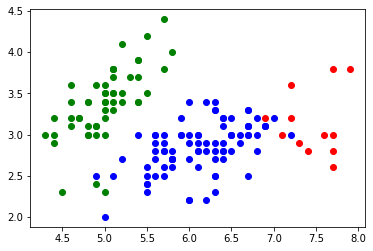

In [114]:
fig = plt.figure()
colors = cycle('bgrcmy')

for k, col in zip(range(n_clusters), colors):
    
    label_mask = (labels == k) 
    plt.scatter(df['Sepal length'][label_mask], df['Sepal width'][label_mask], c=col)

## 7 & 8 ) 

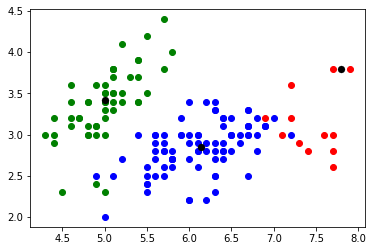

In [115]:
fig = plt.figure()
colors = cycle('bgrcmy')

for k, col in zip(range(n_clusters), colors):
    
    label_mask = (labels == k)
    cluster_center = cluster_centers[k]
    
    plt.scatter(df['Sepal length'][label_mask], df['Sepal width'][label_mask], c=col)
    plt.scatter(cluster_center[0], cluster_center[1], c='k', s=50, linewidth=0.2)

## 9 )

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 2 0 2 0 2 3 0 2 2 3 2
 0 2 0 2 2 2 3 3 0 2 0 3 0 2 2 0 0 2 2 2 3 2 0 0 3 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
[[6.18809524 2.90714286 1.59285714]
 [4.97435897 3.38205128 0.24358974]
 [6.54074074 3.05925926 2.10740741]
 [7.6        3.73333333 2.23333333]]
4


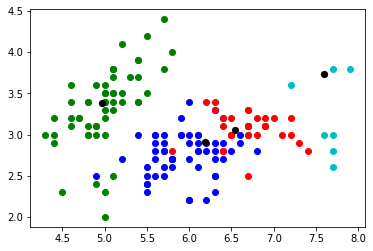

In [116]:
bandwidth = estimate_bandwidth(X=df.drop('Species', axis=1), quantile=0.15)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(df.drop('Species', axis=1))
labels = ms.labels_
cluster_centers = ms.cluster_centers_
labels_unique = np.unique(labels)
n_clusters = len(labels_unique)

print(labels)
print(cluster_centers)
print(n_clusters)

fig = plt.figure()
colors = cycle('bgrcmy')

for k, col in zip(range(n_clusters), colors):
    
    label_mask = (labels == k)
    cluster_center = cluster_centers[k]
    
    plt.scatter(df['Sepal length'][label_mask], df['Sepal width'][label_mask], c=col)
    plt.scatter(cluster_center[0], cluster_center[1], c='k', s=50, linewidth=0.2)